In [2]:
import warnings
warnings.filterwarnings("ignore")


In [10]:
import numpy as np
import panda as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report

In [23]:
df= pd.read_csv("adults.csv")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [95]:
print(df.columns)
df.columns = df.columns.str.strip() 


Index(['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married',
       'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40',
       'United-States', '<=50K'],
      dtype='object')


In [97]:
print(X_train)

       39   State-gov   77516      Bachelors  13        Never-married  \
24639  20     Private  385077           12th   8        Never-married   
5514   21   State-gov  140764   Some-college  10        Never-married   
19777  64     Private  312242   Some-college  10              Widowed   
10781  26     Private  227489        HS-grad   9        Never-married   
32239  21     Private  180190      Assoc-voc  11   Married-civ-spouse   
...    ..         ...     ...            ...  ..                  ...   
29802  35     Private  109351      Bachelors  13        Never-married   
5390   31     Private  101562        HS-grad   9   Married-civ-spouse   
860    43     Private  191547        HS-grad   9   Married-civ-spouse   
15795  21     Private  223352        HS-grad   9        Never-married   
23654  27   Local-gov  236472      Bachelors  13             Divorced   

             Adm-clerical    Not-in-family   White     Male  2174  0  40  \
24639   Machine-op-inspct        Own-child   Wh

In [96]:
X = df.drop(columns=['<=50K']) 
y = df['<=50K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
print(X_test)

       39     State-gov   77516      Bachelors  13        Never-married  \
14160  38       Private  680390        HS-grad   9             Divorced   
27047  45     State-gov   50567        HS-grad   9   Married-civ-spouse   
28867  29       Private  185908      Bachelors  13   Married-civ-spouse   
5667   51       Private  306108      Doctorate  16        Never-married   
7827   46       Private  124071        Masters  14              Widowed   
...    ..           ...     ...            ...  ..                  ...   
13307  45       Private   88500   Some-college  10   Married-civ-spouse   
1338   38     State-gov   34180   Some-college  10   Married-civ-spouse   
24534  17       Private  193748           11th   7        Never-married   
18080  31       Private  192900   Some-college  10        Never-married   
10354  47   Federal-gov  227244      Bachelors  13   Married-civ-spouse   

             Adm-clerical   Not-in-family   White     Male  2174  0  40  \
14160        Adm-clerica

In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y) 
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7962223587223587
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      4912
           1       0.68      0.32      0.44      1600

    accuracy                           0.80      6512
   macro avg       0.75      0.64      0.66      6512
weighted avg       0.78      0.80      0.77      6512



In [100]:
probs = model.predict_proba(X_test)
print("Probability estimates for each sample:\n", probs)

Probability estimates for each sample:
 [[9.98659019e-01 1.34098144e-03]
 [9.85852640e-01 1.41473598e-02]
 [9.83828358e-01 1.61716422e-02]
 ...
 [9.99790507e-01 2.09492627e-04]
 [9.93384714e-01 6.61528650e-03]
 [9.62897249e-01 3.71027510e-02]]


In [118]:

loss_matrix = np.array([[0, 1], [2, 0]])

In [111]:
expected_risk = np.dot(probs, loss_matrix.T)

In [112]:
y_pred_risk_minimized = np.argmin(expected_risk, axis=1)

In [113]:
accuracy = accuracy_score(y_test, y_pred_risk_minimized)
precision = precision_score(y_test, y_pred_risk_minimized)
recall = recall_score(y_test, y_pred_risk_minimized)
f1 = f1_score(y_test, y_pred_risk_minimized)

In [114]:
print("\n Classification Report:")
print(classification_report(y_test, y_pred_risk_minimized))


 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      4912
           1       0.69      0.32      0.43      1600

    accuracy                           0.80      6512
   macro avg       0.75      0.64      0.66      6512
weighted avg       0.78      0.80      0.77      6512



In [115]:
cm = confusion_matrix(y_test, y_pred_risk_minimized)

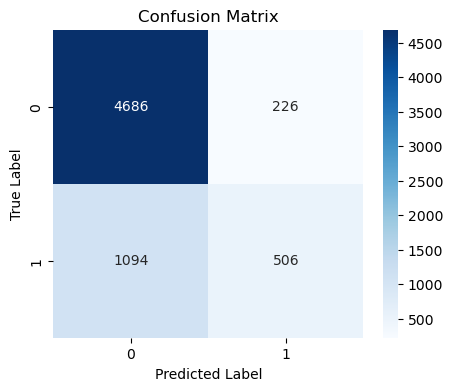

In [116]:
 plt.figure(figsize=(5, 4))
 sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1],yticklabels=[0, 1])
 plt.xlabel("Predicted Label")
 plt.ylabel("True Label")
 plt.title("Confusion Matrix")
 plt.show()